In [10]:
# columns = Rm, Rf, Rm - Rf, SMB, HML, MOM, RMW, CMA, SMBff5
# capm: Ri - Rf = a + b(Rm - Rf) + e
# 3f: Ri - Rf = a + b1 (Rm - Rf) + b2 (SMB) + b3(HML) + e
# 4f: Ri - Rf = a + b1 (Rm - Rf) + b2 (SMB) + b3(HML) + b4 (MOM) + e
# 5f: Ri - Rf = a + b1 (Rm - Rf) + b2 (SMBff5) + b3(RMW) + b4 (CMA) + e

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Load the data
df = pd.read_csv("C:/Users/adam chem/smu/QF603QA/PROJECT/DATATOMODEL_VER1.csv")
asset_i_df = pd.read_csv("C:/Users/adam chem/smu/QF603QA/PROJECT/to_be_used_as_ri.csv")

In [12]:
# capm
# Initialize an empty DataFrame to store summaries
capm = pd.DataFrame()
metrics_list = []

for each in asset_i_df.columns:        
    # Create the 'ri_rf' column
    ri = df[each]
    df['ri_rf'] = ri - df['Rf']

    # Initialize predictors based on the model type
    predictors = ['Rm - Rf']  # For CAPM

    # Add a constant term for the intercept
    X = sm.add_constant(df[predictors])

    # Fit the OLS model
    model = sm.OLS(df['ri_rf'], X).fit()
    
    # Inside your loop, after fitting the model
    bg_test = acorr_breusch_godfrey(model, nlags=1)  # Change nlags based on what you need
    bg_stat, bg_pvalue, _, _ = bg_test

    # Calculate Durbin-Watson statistic
    dw_stat = durbin_watson(model.resid)

    # Calculate Jarque-Bera p-value
    _, _, _, jb_pvalue = sm.stats.jarque_bera(model.resid)

    # Extract and store the relevant metrics
    metrics = {
        'Model_Type': 'CAPM',
        'Asset': each,
        'Adj_R_Squared': model.rsquared_adj,
        'Prob_F_Stat': model.f_pvalue,
        'BIC': model.bic,
        'P_value_alpha': model.pvalues['const'],
        'P_value_Rm_minus_Rf': model.pvalues['Rm - Rf'],
        'Durbin_Watson': dw_stat,
        'Prob_JB': jb_pvalue,
        'Cond_No': model.condition_number,
        'BG_Stat': bg_stat,
        'BG_Pvalue':bg_pvalue
    }
    metrics_list.append(metrics)
    capm = pd.DataFrame(metrics_list)

In [13]:
# ff3
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Initialize an empty DataFrame to store summaries
ff3 = pd.DataFrame()
metrics_list = []

for each in asset_i_df.columns:        
    # Create the 'ri_rf' column
    ri = df[each]
    df['ri_rf'] = ri - df['Rf']

    # Initialize predictors based on the model type
    predictors = ['Rm - Rf', 'SMB', 'HML']

    # Add a constant term for the intercept
    X = sm.add_constant(df[predictors])

    # Fit the OLS model
    model = sm.OLS(df['ri_rf'], X).fit()

    # Inside your loop, after fitting the model
    bg_test = acorr_breusch_godfrey(model, nlags=1)  # Change nlags based on what you need
    bg_stat, bg_pvalue, _, _ = bg_test
    
    # Calculate Durbin-Watson statistic
    dw_stat = durbin_watson(model.resid)

    # Calculate Jarque-Bera p-value
    _, _, _, jb_pvalue = sm.stats.jarque_bera(model.resid)

    # Extract and store the relevant metrics
    metrics = {
        'Model_Type': 'FF3',
        'Asset': each,
        'Adj_R_Squared': model.rsquared_adj,
        'Prob_F_Stat': model.f_pvalue,
        'BIC': model.bic,
        'P_value_alpha': model.pvalues['const'],
        'P_value_Rm_minus_Rf': model.pvalues['Rm - Rf'],
        'P_value_SMB': model.pvalues['SMB'],
        'P_value_HML': model.pvalues['HML'],
        'Durbin_Watson': dw_stat,
        'Prob_JB': jb_pvalue,
        'Cond_No': model.condition_number,
        'BG_Stat': bg_stat,
        'BG_Pvalue':bg_pvalue
    }
    metrics_list.append(metrics)
    ff3 = pd.DataFrame(metrics_list)

In [14]:
# ff4
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Initialize an empty DataFrame to store summaries
ff4 = pd.DataFrame()
metrics_list = []

for each in asset_i_df.columns:        
    # Create the 'ri_rf' column
    ri = df[each]
    df['ri_rf'] = ri - df['Rf']

    # Initialize predictors based on the model type
    predictors = ['Rm - Rf', 'SMB', 'HML', 'MOM']

    # Add a constant term for the intercept
    X = sm.add_constant(df[predictors])

    # Fit the OLS model
    model = sm.OLS(df['ri_rf'], X).fit()
    
    # Inside your loop, after fitting the model
    bg_test = acorr_breusch_godfrey(model, nlags=1)  # Change nlags based on what you need
    bg_stat, bg_pvalue, _, _ = bg_test
    
    # Calculate Durbin-Watson statistic
    dw_stat = durbin_watson(model.resid)

    # Calculate Jarque-Bera p-value
    _, _, _, jb_pvalue = sm.stats.jarque_bera(model.resid)

    # Extract and store the relevant metrics
    metrics = {
        'Model_Type': 'FF4',
        'Asset': each,
        'Adj_R_Squared': model.rsquared_adj,
        'Prob_F_Stat': model.f_pvalue,
        'BIC': model.bic,
        'P_value_alpha': model.pvalues['const'],
        'P_value_Rm_minus_Rf': model.pvalues['Rm - Rf'],
        'P_value_SMB': model.pvalues['SMB'],
        'P_value_HML': model.pvalues['HML'],
        'P_value_MOM': model.pvalues['MOM'],
        'Durbin_Watson': dw_stat,
        'Prob_JB': jb_pvalue,
        'Cond_No': model.condition_number,
        'BG_Stat': bg_stat,
        'BG_Pvalue':bg_pvalue
    }
    metrics_list.append(metrics)
    ff4 = pd.DataFrame(metrics_list)

In [15]:
asset_i_df.columns

Index(['s/h', 's/n', 's/l', 'b/h', 'b/n', 'b/l', 's/w', 's/m', 's/r', 'b/w',
       'b/m', 'b/r', 's/c', 's/n.1', 's/a', 'b/c', 'b/n.1', 'b/a'],
      dtype='object')

In [16]:
# ff5
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Initialize an empty DataFrame to store summaries
ff5 = pd.DataFrame()
metrics_list = []

for each in asset_i_df.columns:        
    # Create the 'ri_rf' column
    ri = df[each]
    df['ri_rf'] = ri - df['Rf']

    # Initialize predictors based on the model type
    predictors = ['Rm - Rf', 'SMBff5', 'RMW', 'CMA']

    # Add a constant term for the intercept
    X = sm.add_constant(df[predictors])

    # Fit the OLS model
    model = sm.OLS(df['ri_rf'], X).fit()
    
    # Inside your loop, after fitting the model
    bg_test = acorr_breusch_godfrey(model, nlags=1)  # Change nlags based on what you need
    bg_stat, bg_pvalue, _, _ = bg_test

    
    # Calculate Durbin-Watson statistic
    dw_stat = durbin_watson(model.resid)

    # Calculate Jarque-Bera p-value
    _, _, _, jb_pvalue = sm.stats.jarque_bera(model.resid)

    # Extract and store the relevant metrics
    metrics = {
        'Model_Type': 'FF5',
        'Asset': each,
        'Adj_R_Squared': model.rsquared_adj,
        'Prob_F_Stat': model.f_pvalue,
        'BIC': model.bic,
        'P_value_alpha': model.pvalues['const'],
        'P_value_Rm_minus_Rf': model.pvalues['Rm - Rf'],
        'P_value_SMB': model.pvalues['SMBff5'],
        'P_value_HML': model.pvalues['RMW'],
        'P_value_MOM': model.pvalues['CMA'],
        'Durbin_Watson': dw_stat,
        'Prob_JB': jb_pvalue,
        'Cond_No': model.condition_number,
        'BG_Stat': bg_stat,
        'BG_Pvalue':bg_pvalue
    }
    metrics_list.append(metrics)
    ff5 = pd.DataFrame(metrics_list)

In [30]:
summary_df = pd.concat([capm, ff3, ff4, ff5], axis=1)

In [17]:
print(capm['BIC'].mean())
print(ff3['BIC'].mean())
print(ff4['BIC'].mean())
print(ff5['BIC'].mean())
# ff5 is the best as it has lowest bic

-247.46892632750138
-271.5368250382058
-273.69311499179076
-276.7166940085336


In [18]:
print(capm['Adj_R_Squared'].mean())
print(ff3['Adj_R_Squared'].mean())
print(ff4['Adj_R_Squared'].mean())
print(ff5['Adj_R_Squared'].mean())
# ff5 is the best as it has highest adjustede R^2

0.7480503150808038
0.8594842051339835
0.8708469610881764
0.8794171210687622


In [19]:
ff5['Prob_F_Stat'].describe()
# near-zero p-value for f test means model is statistically significant (i.e. rej H0 that b1=b2=...=0)

count    1.800000e+01
mean     4.273948e-21
std      1.652530e-20
min      1.056755e-31
25%      1.192979e-27
50%      3.370325e-26
75%      8.368052e-23
max      7.022001e-20
Name: Prob_F_Stat, dtype: float64

In [20]:
ff5[(ff5['P_value_alpha']<=0.05)]
# only  1 portoflio ('s/n' with coefficient of constant = 0.0068) has statistically significaint alpha (y intercept), 
# this means only this portfolio that generates nonzero excess average returns

,Model_Type,Asset,Adj_R_Squared,Prob_F_Stat,BIC,P_value_alpha,P_value_Rm_minus_Rf,P_value_SMB,P_value_HML,P_value_MOM,Durbin_Watson,Prob_JB,Cond_No,BG_Stat,BG_Pvalue
1,FF5,s/n,0.894943,4.596623e-27,-289.438136,0.021371,3.346696e-25,9.121304e-08,0.408318,0.000017,1.918422,3.2361,41.894789,0.104424,0.746584


In [21]:
ff5[(ff5['P_value_Rm_minus_Rf']<=0.05) & (ff5['P_value_SMB']<=0.05) & (ff5['P_value_HML']<=0.05) & (ff5['P_value_MOM']<=0.05)]
# 2 portfolios has statistically significant other 4 factors

,Model_Type,Asset,Adj_R_Squared,Prob_F_Stat,BIC,P_value_alpha,P_value_Rm_minus_Rf,P_value_SMB,P_value_HML,P_value_MOM,Durbin_Watson,Prob_JB,Cond_No,BG_Stat,BG_Pvalue
7,FF5,s/m,0.892729,8.138663e-27,-288.599780,0.596088,4.062610e-24,8.361030e-10,1.669865e-02,0.000012,2.491031,2.473235,41.894789,4.136559,0.041966
8,FF5,s/r,0.885498,4.858829e-26,-247.470748,0.595198,2.014458e-19,1.436166e-12,3.686553e-10,0.012478,2.144751,2.779548,41.894789,0.818995,0.365474


In [22]:
len(ff5[ff5['P_value_SMB']<=0.05])
# 9 portfolios has statistically significant smb

9

In [23]:
len(ff5[ff5['P_value_HML']<=0.05])
# 4 portfolios has statistically significant smb

4

In [24]:
len(ff5[ff5['P_value_MOM']<=0.05])
# 13 portfolios has statistically significant smb

13

In [37]:
len(ff5[ff5['P_value_Rm_minus_Rf'] <=0.05])
# all 18 ff5 portfolio has statistically significant beta 

18

In [38]:
len(ff5[ff5['Prob_JB']<=0.05])
# all portfolios has residual are normally distributed

0

(array([1., 0., 0., 1., 6., 2., 2., 2., 2., 2.]),
 array([1.52941104, 1.62763509, 1.72585914, 1.82408319, 1.92230725,
        2.0205313 , 2.11875535, 2.2169794 , 2.31520345, 2.41342751,
        2.51165156]),
 <BarContainer object of 10 artists>)

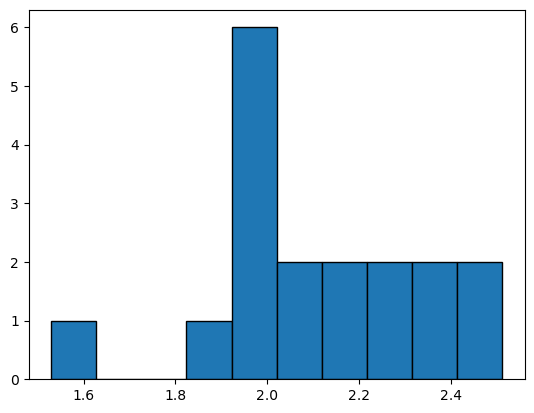

In [39]:
ff5['Durbin_Watson'].describe()
import matplotlib.pyplot as plt
plt.hist(ff5['Durbin_Watson'], bins=10, edgecolor='black')
# dw value near 2 means no serial correlation
# ask prof about what value means there is serial correlation

In [47]:
len(ff5[ff5['BG_Pvalue']<=0.05])
# bg test for autocorrelation in more than 1 lags --> only 2 ff5 portfolios has no multi-lgs autocorrelation

2

In [40]:
ff5['Cond_No']
# between 30-100 means moederate multicollinearity, means some variables are moerately correlated, hence not easy
# to isolate the impact one single predictor onto the independent variable
# only capm model has <30 cond_no, the other 3 has >30

# why the 'condition number' is the same for all portfolio in each model?
# Identical Input Data: If the portfolios in each model are constructed using the same underlying data for independent variables, the condition number will naturally be identical.
# Model Structure: If the equation structure is consistent across portfolios, then the condition number is likely to be the same. For instance, if you're using the same variables to construct the CAPM or Fama-French models for each portfolio, then the condition number will remain consistent.

0     41.894789
1     41.894789
2     41.894789
3     41.894789
4     41.894789
5     41.894789
6     41.894789
7     41.894789
8     41.894789
9     41.894789
10    41.894789
11    41.894789
12    41.894789
13    41.894789
14    41.894789
15    41.894789
16    41.894789
17    41.894789
Name: Cond_No, dtype: float64

In [41]:
capm['Cond_No']

0     19.948979
1     19.948979
2     19.948979
3     19.948979
4     19.948979
5     19.948979
6     19.948979
7     19.948979
8     19.948979
9     19.948979
10    19.948979
11    19.948979
12    19.948979
13    19.948979
14    19.948979
15    19.948979
16    19.948979
17    19.948979
Name: Cond_No, dtype: float64

In [42]:
ff3['Cond_No']

0     35.341855
1     35.341855
2     35.341855
3     35.341855
4     35.341855
5     35.341855
6     35.341855
7     35.341855
8     35.341855
9     35.341855
10    35.341855
11    35.341855
12    35.341855
13    35.341855
14    35.341855
15    35.341855
16    35.341855
17    35.341855
Name: Cond_No, dtype: float64

In [43]:
ff4['Cond_No']

0     43.751995
1     43.751995
2     43.751995
3     43.751995
4     43.751995
5     43.751995
6     43.751995
7     43.751995
8     43.751995
9     43.751995
10    43.751995
11    43.751995
12    43.751995
13    43.751995
14    43.751995
15    43.751995
16    43.751995
17    43.751995
Name: Cond_No, dtype: float64